In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import numpy as np

In [3]:
os.chdir("C:/Users/Abhie/Desktop/Data Science (BI)/Pandas Python/Linear Regression/Big Mart")

In [4]:
test= pd.read_csv("test_Bigmart.csv", encoding="unicode_escape")

In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train= pd.read_csv("train_Bigmart.csv", encoding="unicode_escape")

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
print(test.shape)
print(train.shape)

(5681, 11)
(8523, 12)


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
bmart = train.append(test)

In [12]:
bmart.shape

(14204, 12)

In [13]:
bmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
bmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [16]:
bmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# EDA

In [17]:
#Univariate analysis (All Categorical variables)
bmart["Item_Fat_Content"].nunique()

5

In [18]:
bmart["Item_Fat_Content"].value_counts(normalize = True)*100

Low Fat    59.736694
Regular    33.962264
LF          3.675021
reg         1.372853
low fat     1.253168
Name: Item_Fat_Content, dtype: float64

In [19]:
##Replacing 'LF','low fat',reg' with 'Low Fat','Regular'
bmart["Item_Fat_Content"]=bmart["Item_Fat_Content"].replace(["LF","low fat"], "Low Fat")
bmart["Item_Fat_Content"]=bmart["Item_Fat_Content"].replace("reg","Regular")

In [20]:
bmart["Item_Fat_Content"].value_counts(normalize=True)*100

Low Fat    64.664883
Regular    35.335117
Name: Item_Fat_Content, dtype: float64

In [21]:
bmart["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [22]:
bmart["Item_Identifier1"]=bmart["Item_Identifier"].str[:2]

In [23]:
bmart["Item_Identifier1"].value_counts(normalize=True)*100

FD    71.817798
NC    18.910166
DR     9.272036
Name: Item_Identifier1, dtype: float64

In [24]:
bmart["Item_Type"].value_counts(normalize=True)*100

Fruits and Vegetables    14.172064
Snack Foods              14.003098
Household                10.898338
Frozen Foods             10.039426
Dairy                     7.997747
Baking Goods              7.645734
Canned                    7.631653
Health and Hygiene        6.040552
Meat                      5.181639
Soft Drinks               5.111236
Breads                    2.928752
Hard Drinks               2.548578
Others                    1.971276
Starchy Foods             1.893833
Breakfast                 1.309490
Seafood                   0.626584
Name: Item_Type, dtype: float64

In [25]:
bmart.Item_Type.isnull().sum()

0

In [26]:
bmart["Outlet_Identifier"].value_counts(normalize=True)*100

OUT027    10.975781
OUT013    10.933540
OUT049    10.912419
OUT046    10.912419
OUT035    10.912419
OUT045    10.898338
OUT018    10.884258
OUT017    10.863137
OUT010     6.512250
OUT019     6.195438
Name: Outlet_Identifier, dtype: float64

In [27]:
bmart.Outlet_Identifier.isnull().sum()

0

In [97]:
bmart["Item_Identifier1"]=bmart["Item_Identifier"].str[:2]
bmart["Item_Identifier1"].value_counts(normalize=True)*100

FD    71.817798
NC    18.910166
DR     9.272036
Name: Item_Identifier1, dtype: float64

In [28]:
bmart["Outlet_Location_Type"].value_counts(normalize=True)*100

Tier 3    39.305829
Tier 2    32.673895
Tier 1    28.020276
Name: Outlet_Location_Type, dtype: float64

In [29]:
bmart.Outlet_Location_Type.isnull().sum()

0

In [30]:
bmart.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [31]:
bmart["Outlet_Size"].value_counts(normalize=True)*100

Medium    45.691009
Small     39.065567
High      15.243424
Name: Outlet_Size, dtype: float64

In [32]:
bmart.Outlet_Size.isnull().sum()

4016

In [33]:
bmart["Outlet_Type"].value_counts(normalize=True)*100

Supermarket Type1    65.432273
Grocery Store        12.707688
Supermarket Type3    10.975781
Supermarket Type2    10.884258
Name: Outlet_Type, dtype: float64

In [34]:
bmart["Outlet_Type"].isnull().sum()

0

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

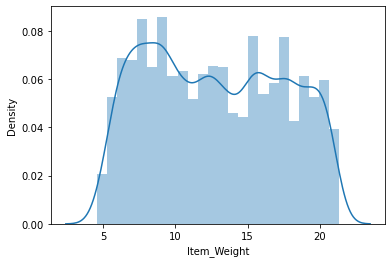

In [35]:
#Univariate Analysis (Numerical Variables)
sns.distplot(bmart["Item_Weight"])

In [36]:
bmart["Item_Weight"].isnull().sum()

2439

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

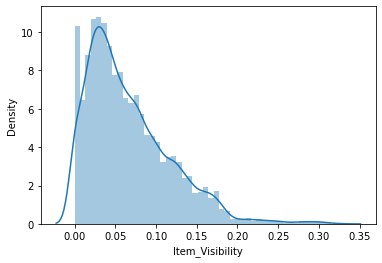

In [37]:
sns.distplot(bmart["Item_Visibility"])

<AxesSubplot:xlabel='Item_Visibility'>

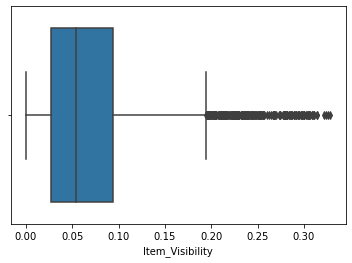

In [38]:
sns.boxplot(bmart["Item_Visibility"])

In [39]:
bmart["Item_Visibility"].isnull().sum()

0

## Outlier Treatment

In [40]:
#IQR Method
Q3=np.percentile(bmart["Item_Visibility"],75)
Q1=np.percentile(bmart["Item_Visibility"],25)

In [41]:
IQR=Q3-Q1
trh=1.5*IQR
trh

0.10050235650000001

In [42]:
(bmart[bmart["Item_Visibility"]>trh]["Item_Visibility"].count()/bmart.shape[0])*100

22.02196564348071

In [43]:
bmart["Item_Visibility_iqr"]=np.where(bmart["Item_Visibility"]>trh,trh,bmart["Item_Visibility"])

<AxesSubplot:xlabel='Item_Visibility_iqr', ylabel='Density'>

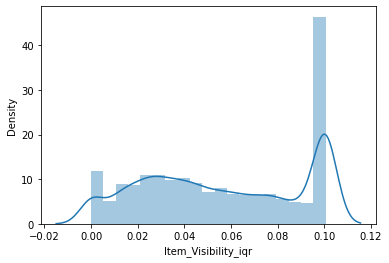

In [44]:
sns.distplot(bmart["Item_Visibility_iqr"])

In [45]:
#Percentile Method
P=np.percentile(bmart["Item_Visibility"],98)
P

0.187841082

In [46]:
bmart["Item_Visibility_P"]=np.where(bmart["Item_Visibility"]>P,P,bmart["Item_Visibility"])

In [47]:
(bmart[bmart["Item_Visibility"]>P]["Item_Visibility"].count()/bmart.shape[0])*100

1.9994367783722895

<AxesSubplot:xlabel='Item_Visibility_P', ylabel='Density'>

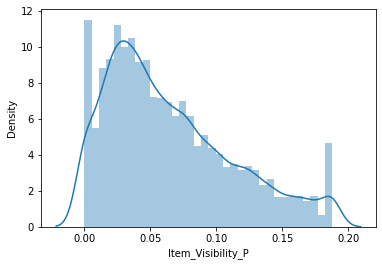

In [48]:
sns.distplot(bmart["Item_Visibility_P"])

In [49]:
#3-SD Rule
m=np.mean(bmart["Item_Visibility"])
std=np.std(bmart["Item_Visibility"])
Sd3=m+3*std
Sd3

0.22032313148728

In [50]:
(bmart[bmart["Item_Visibility"]>Sd3]["Item_Visibility"].count()/bmart.shape[0])*100

1.2179667699239651

In [51]:
bmart["Item_Visibility_sd"]=np.where(bmart.Item_Visibility>Sd3,Sd3,bmart.Item_Visibility)

<AxesSubplot:xlabel='Item_Visibility_sd', ylabel='Density'>

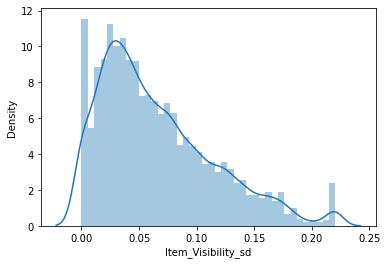

In [52]:
sns.distplot(bmart["Item_Visibility_sd"])

In [53]:
#SQRT Method
bmart["Item_Visibility_sqrt"]=np.sqrt(bmart["Item_Visibility"])

In [54]:
mean_0=np.mean(bmart[bmart["Item_Visibility"]>0]["Item_Visibility_sqrt"])
mean_0

0.24885661573610723

In [55]:
np.mean(bmart["Item_Visibility_sqrt"])

0.23345637881467396

In [56]:
bmart["Item_Visibility_sqrt"]=bmart['Item_Visibility_sqrt'].replace(0,mean_0)

<AxesSubplot:xlabel='Item_Visibility_sqrt', ylabel='Density'>

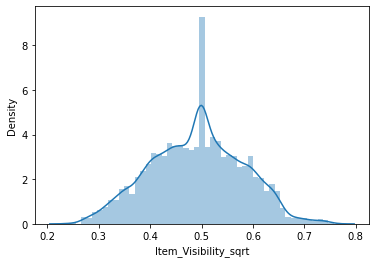

In [57]:
sns.distplot(np.sqrt(bmart['Item_Visibility_sqrt']))

In [58]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Identifier1           14204 non-null  object 
 13  Item_Visibility_iqr        14204 non-null  floa

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

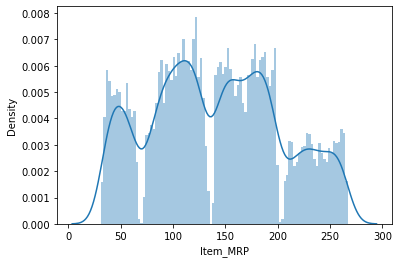

In [60]:
sns.distplot(bmart["Item_MRP"],bins=100)

In [61]:
bmart["Item_MRP"].isnull().sum()

0

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

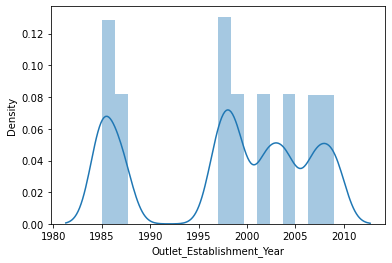

In [62]:
sns.distplot(bmart["Outlet_Establishment_Year"])

In [63]:
#Making a new variable ["Tenure"] for determining the tenure of Outlet from Establishment year, till date
bmart["Tenure"] = 2020-bmart["Outlet_Establishment_Year"]
bmart["Tenure"]

0       21
1       11
2       21
3       22
4       33
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Tenure, Length: 14204, dtype: int64

In [64]:
bmart["Tenure"].describe()

count    14204.000000
mean        22.169319
std          8.371664
min         11.000000
25%         16.000000
50%         21.000000
75%         33.000000
max         35.000000
Name: Tenure, dtype: float64

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

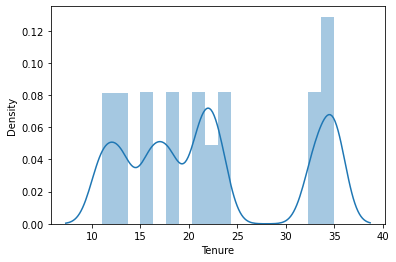

In [65]:
sns.distplot(bmart["Tenure"])

In [66]:
# Converted Numerical variable to Categorical Variable i.e "bins"
bmart["Tenure_bins"]=np.where(bmart["Tenure"]<=15,"0-15_yrs",
                             np.where(bmart["Tenure"]>30,">30_yrs","16-30_yrs"))
bmart["Tenure_bins"].value_counts(normalize=True)*100

16-30_yrs    50.147846
>30_yrs      28.104759
0-15_yrs     21.747395
Name: Tenure_bins, dtype: float64

In [67]:
bmart["Tenure_bins1"]=np.where(bmart["Tenure"]<=10,"0-10_yrs",
                             np.where(bmart["Tenure"]<20,"11-20_yrs",np.where(bmart["Tenure"]<30,"21-30_yrs","31-40_yrs")))

In [68]:
bmart["Tenure_bins1"].value_counts(normalize=True)*100

11-20_yrs    43.558153
21-30_yrs    28.337088
31-40_yrs    28.104759
Name: Tenure_bins1, dtype: float64

In [69]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Identifier1           14204 non-null  object 
 13  Item_Visibility_iqr        14204 non-null  floa

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

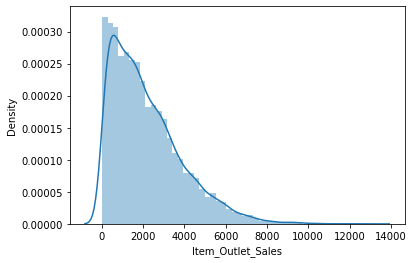

In [70]:
sns.distplot(bmart["Item_Outlet_Sales"])

<AxesSubplot:>

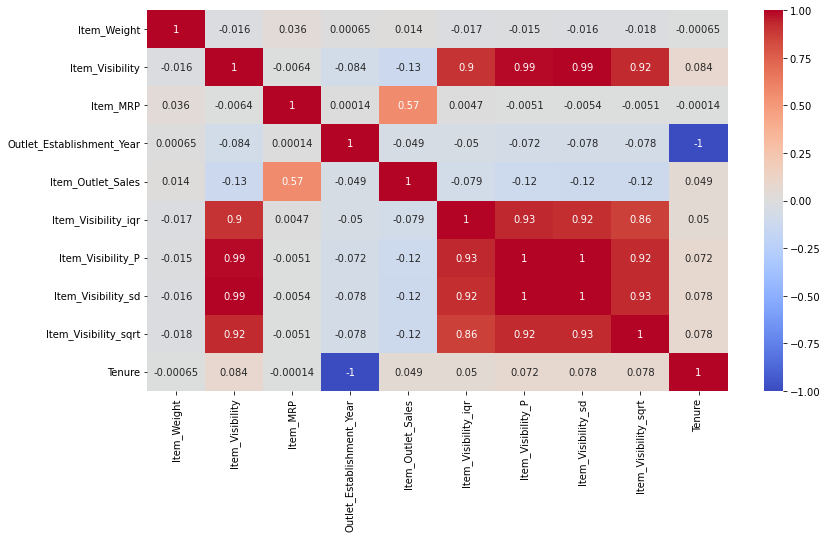

In [71]:
plt.figure(figsize=(13,7))
sns.heatmap(bmart.corr(), annot= True, vmin=-1, vmax=1, center=0, cmap="coolwarm")

# Bivariate Analysis

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

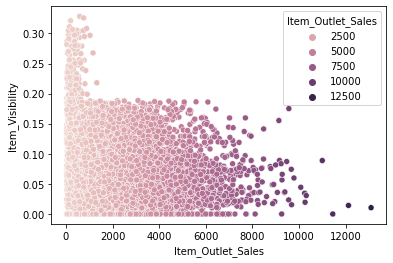

In [72]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_Visibility',data=bmart,hue='Item_Outlet_Sales')

In [73]:
pd.crosstab(np.mean(bmart["Item_Weight"]),bmart["Item_Type"]).T

row_0,12.792854
Item_Type,
Baking Goods,1086
Breads,416
Breakfast,186
Canned,1084
Dairy,1136
Frozen Foods,1426
Fruits and Vegetables,2013
Hard Drinks,362
Health and Hygiene,858


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Type'>

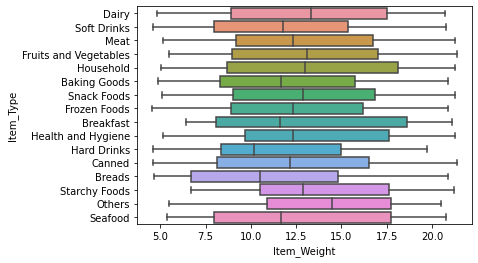

In [74]:
sns.boxplot(x=bmart['Item_Weight'],y=bmart['Item_Type'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

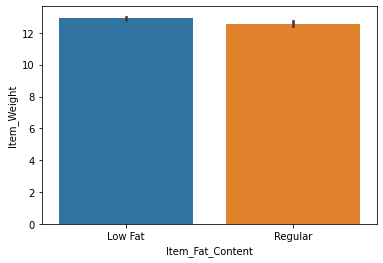

In [75]:
sns.barplot(x=bmart['Item_Fat_Content'],y=bmart['Item_Weight'])

In [76]:
pd.crosstab(bmart['Item_Type'],bmart['Item_Weight'].isnull())

Item_Weight,False,True
Item_Type,,
Baking Goods,900,186
Breads,343,73
Breakfast,152,34
Canned,898,186
Dairy,941,195
Frozen Foods,1175,251
Fruits and Vegetables,1667,346
Hard Drinks,303,59
Health and Hygiene,710,148


# Missing Value Treatment

In [77]:
bmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Identifier1                0
Item_Visibility_iqr             0
Item_Visibility_P               0
Item_Visibility_sd              0
Item_Visibility_sqrt            0
Tenure                          0
Tenure_bins                     0
Tenure_bins1                    0
dtype: int64

In [78]:
bmart["Item_Weight"]=bmart["Item_Weight"].fillna(bmart["Item_Weight"].groupby(bmart["Item_Type"]).transform("mean"))

In [79]:
bmart.Item_Weight.isnull().sum()

0

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

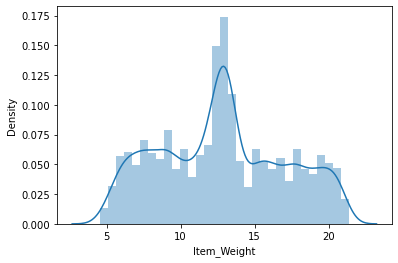

In [80]:
sns.distplot(bmart["Item_Weight"])

In [81]:
pd.crosstab(bmart["Outlet_Size"],bmart["Item_Outlet_Sales"]).T

Outlet_Size,High,Medium,Small
Item_Outlet_Sales,,,
33.9558,0,0,1
34.6216,0,0,1
36.6190,0,0,1
37.2848,0,0,1
37.9506,0,0,4
...,...,...,...
10306.5840,0,1,0
10993.6896,0,1,0
11445.1020,0,1,0


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

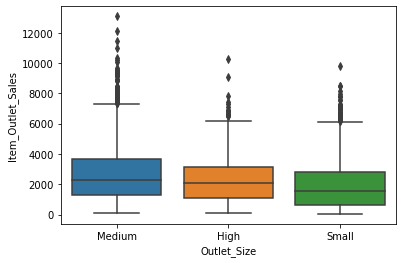

In [82]:
sns.boxplot(bmart['Outlet_Size'],bmart['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

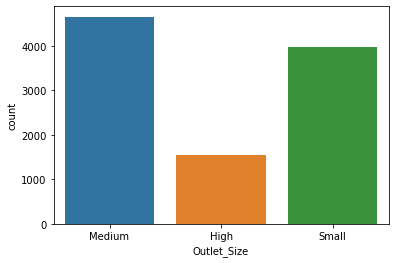

In [83]:
sns.countplot(bmart.Outlet_Size)

In [84]:
bmart['Outlet_Size']=bmart['Outlet_Size'].fillna("MISSING")

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

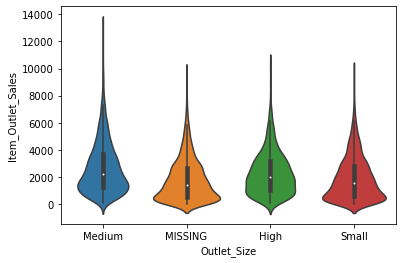

In [85]:
sns.violinplot(bmart['Outlet_Size'],bmart['Item_Outlet_Sales'])

In [86]:
bmart['Outlet_Size']=bmart['Outlet_Size'].replace("MISSING", "Medium")

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

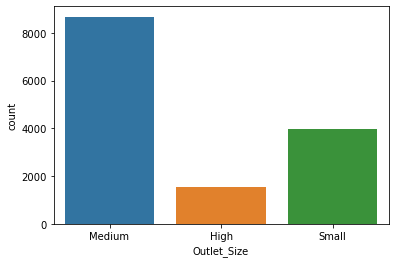

In [87]:
sns.countplot(bmart.Outlet_Size)

In [88]:
bmart["Outlet_Size"].value_counts(normalize=True)*100

Medium    61.046184
Small     28.020276
High      10.933540
Name: Outlet_Size, dtype: float64

In [89]:
bmart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Identifier1                0
Item_Visibility_iqr             0
Item_Visibility_P               0
Item_Visibility_sd              0
Item_Visibility_sqrt            0
Tenure                          0
Tenure_bins                     0
Tenure_bins1                    0
dtype: int64

In [98]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Identifier1           14204 non-null  object 
 13  Item_Visibility_iqr        14204 non-null  floa

# Copying Main Data

In [123]:
bmart1=bmart.copy()

In [124]:
bmart1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier1,Item_Visibility_iqr,Item_Visibility_P,Item_Visibility_sd,Item_Visibility_sqrt,Tenure,Tenure_bins,Tenure_bins1
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,0.016047,0.016047,0.016047,0.126678,21,16-30_yrs,21-30_yrs
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,0.019278,0.019278,0.019278,0.138846,11,0-15_yrs,11-20_yrs
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,0.016760,0.016760,0.016760,0.129461,21,16-30_yrs,21-30_yrs
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,0.000000,0.000000,0.000000,0.248857,22,16-30_yrs,21-30_yrs
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,0.000000,0.000000,0.000000,0.248857,33,>30_yrs,31-40_yrs


In [125]:
bmart1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Identifier1           14204 non-null  object 
 13  Item_Visibility_iqr        14204 non-null  floa

In [126]:
bmart1.drop(["Item_Visibility","Tenure","Tenure_bins", "Item_Visibility_iqr",
            "Item_Visibility_sqrt", "Item_Visibility_sd"], axis=1, inplace=True)

In [127]:
bmart1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Item_Identifier1           14204 non-null  object 
 12  Item_Visibility_P          14204 non-null  float64
 13  Tenure_bins1               14204 non-null  obje

In [128]:
bmart1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Identifier1                0
Item_Visibility_P               0
Tenure_bins1                    0
dtype: int64

# Dummy Variables

In [129]:
bmart1 = pd.get_dummies(bmart1, drop_first=True)

In [130]:
bmart1.shape

(14204, 1599)

In [131]:
bmart1.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_P,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier1_FD,Item_Identifier1_NC,Tenure_bins1_21-30_yrs,Tenure_bins1_31-40_yrs
0,9.30,249.8092,1999,3735.1380,0.016047,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,5.92,48.2692,2009,443.4228,0.019278,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,17.50,141.6180,1999,2097.2700,0.016760,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,19.20,182.0950,1998,732.3800,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,8.93,53.8614,1987,994.7052,0.000000,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1


# Alloting Test and Train

In [132]:
test_c1=bmart1[bmart1["Item_Outlet_Sales"].isnull()]
train_c1=bmart1[bmart1["Item_Outlet_Sales"].notnull()]

In [133]:
print(train_c1.shape)
print(test_c1.shape)

(8523, 1599)
(5681, 1599)


In [134]:
test_c1=test_c1.drop("Item_Outlet_Sales", axis=1)

# Alloting Dependent and Independent Variable

In [135]:
train_y=train_c1["Item_Outlet_Sales"] #Dependent Variable

In [136]:
train_x=train_c1.drop("Item_Outlet_Sales", axis=1)  # Independent Variable

In [137]:
print(train_y.shape)
print(train_x.shape)

(8523,)
(8523, 1598)


# Model Building

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
LR=LinearRegression()

In [140]:
LR.fit(train_x,train_y)

LinearRegression()

In [141]:
#Alpha Value
LR.intercept_

2385367878906337.0

In [142]:
#Beta Values
LR.coef_

array([-1.44981180e+00, -3.77334062e-02, -1.18985868e+12, ...,
        3.93469784e+12, -2.67549952e+12, -3.55425451e+12])

In [143]:
##Converting Coefficeint to arrays
coef_LR=pd.DataFrame(LR.coef_,train_x.columns, columns=["Coefficient"])
coef_LR

,Coefficient
Item_Weight,-1.449812e+00
Item_MRP,-3.773341e-02
Outlet_Establishment_Year,-1.189859e+12
Item_Visibility_P,-3.392026e+02
Item_Identifier_DRA24,-5.326541e+10
...,...
Outlet_Type_Supermarket Type3,-8.842734e+12
Item_Identifier1_FD,4.476661e+11
Item_Identifier1_NC,3.934698e+12
Tenure_bins1_21-30_yrs,-2.675500e+12


# Model Prediction

In [144]:
y_predict= LR.predict(test_c1)
y_predict

array([1688.5, 1612. , 2523. , ..., 2051. , 2671. , 1761.5])

In [145]:
test_c1.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Visibility_P,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier1_FD,Item_Identifier1_NC,Tenure_bins1_21-30_yrs,Tenure_bins1_31-40_yrs
0,20.750000,107.8622,1999,0.007565,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,8.300000,87.3198,2007,0.038428,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,14.600000,241.7538,1998,0.099575,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,7.315000,155.0340,2007,0.015388,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,13.238358,234.2300,1985,0.118599,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1


In [146]:
test_final=bmart[bmart["Item_Outlet_Sales"].isnull()]
test_final.shape

(5681, 20)

In [147]:
test_final.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier1,Item_Visibility_iqr,Item_Visibility_P,Item_Visibility_sd,Item_Visibility_sqrt,Tenure,Tenure_bins,Tenure_bins1
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,FD,0.007565,0.007565,0.007565,0.086976,21,16-30_yrs,21-30_yrs
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,FD,0.038428,0.038428,0.038428,0.196030,13,0-15_yrs,11-20_yrs
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN,NC,0.099575,0.099575,0.099575,0.315555,22,16-30_yrs,21-30_yrs
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,FD,0.015388,0.015388,0.015388,0.124050,13,0-15_yrs,11-20_yrs
4,FDY38,13.238358,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,FD,0.100502,0.118599,0.118599,0.344383,35,>30_yrs,31-40_yrs


In [148]:
data_final=test_final[["Item_Identifier","Outlet_Identifier"]]
data_final.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


# Concatinating Predicted Sales with data_final

In [149]:
data_pred = pd.concat([data_final, pd.DataFrame(y_predict, columns=["Item_Outlet_Sales"])], axis=1)

# Predicted Output Sales

In [150]:
data_pred.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1688.5
1,FDW14,OUT017,1612.0
2,NCN55,OUT010,2523.0
3,FDQ58,OUT017,2105.0
4,FDY38,OUT027,5237.0


# Exporting final predicted Output

In [151]:
data_pred.to_csv("Predicted Sales in Bigmart_4.csv", index=False)

# Cross Validating Magnitude of each variable

In [152]:
val=train_x.columns

In [153]:
coefficient=pd.Series(LR.coef_,val).sort_values()

<AxesSubplot:>

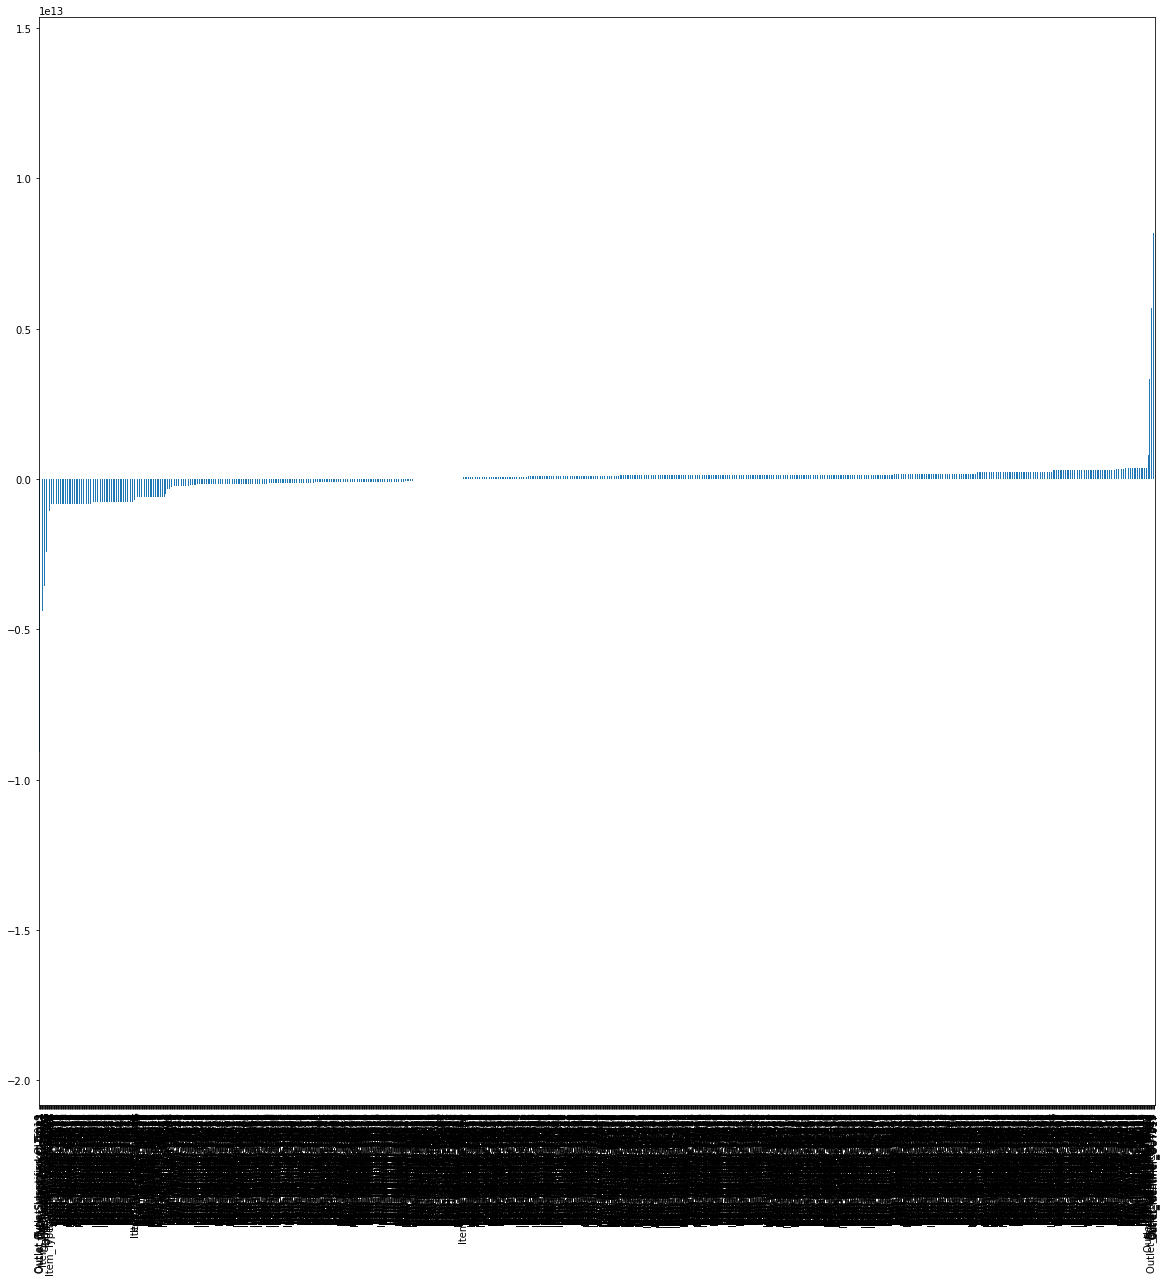

In [156]:
plt.figure(figsize=(20,20))
coefficient.plot(kind="bar")

In [155]:
LR.score(train_x,train_y)

0.6433109790241089